# Project - Nonlinear programming
Bartosz Tuzel, Jan Widanka

An environmental scientist wants to find out whether the temperatures or their amplitudes in his country have an increasing trend. In order to do that he tries to fit the curve (showing theoretical dependence of average monthly temperature $T$ on time in months $t$):

$$ T(t) = \left(\alpha(t − t_{0}) + \beta \right) \sin \left(\frac{2\pi(t − t_{0})}{12} \right) + \gamma t + \delta, $$

(where $\alpha, \beta, \gamma, \delta$ and $t_{0}$ are the parameters of the curve) to the average monthly temperatures given in the table below: 

Based on that we will write a procedure allowing us to find the parameters of the function $T$ minimizing the sum of the squares of the deviations between the real and the predicted values of the temperatures.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import autograd.numpy as np
from autograd import grad, hessian

In [2]:
data = {'year':[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        'Jan': [ 1. ,  1.3,  0.1,  0.9,  1.9,  2.1,  1.9,  1.5,  2.4,  1.4],
        'Feb': [ 1.3,  0.7,  1.2,  1.6,  2.3,  0.2,  0.9,  1.5,  1.7,  2.6],
        'Mar': [ 3.5,  3.2,  3.8,  5.1,  4.5,  3.9,  4.5,  5.4,  5. ,  5.9],
        'Apr': [ 7.8,  6.7,  5.3,  7.9,  8.4,  7.3,  8.9,  9.1,  6.1,  8.4],
        'May': [12.5, 12.7, 11.5, 10.2, 12. , 11.6, 13.8, 15.1, 13.7, 12.9],
        'Jun': [15.1, 14.9, 14.5, 14.2, 15.9, 15.7, 16.8, 15.3, 17.2, 18.3],
        'Jul': [17.9, 15.9, 16.1, 16.3, 17.8, 18.5, 17.9, 18.8, 20.1, 19.7],
        'Aug': [15.7, 16.3, 17.8, 19.8, 18.9, 19.9, 18.1, 20. , 18.7, 20.5],
        'Sep': [12.9, 14.5, 15.1, 12.5, 13. , 12.7, 15.6, 14.1, 14.8, 15.7],
        'Oct': [ 9.1,  9. ,  8. ,  9.3,  8.7,  8.1,  7.4,  8.5,  7.9,  9.6],
        'Nov': [ 4.5,  4.1,  3.2,  6. ,  6.3,  4.2,  6.9,  5.3,  7.7,  3.7],
        'Dec': [ 2.1,  1.2,  1.9,  3.2,  3. ,  2.8,  2.3,  1.7,  3.5,  2.6]}

In [3]:
avg_temperature_data_frame = pd.DataFrame(data)
avg_temperature_data_frame = avg_temperature_data_frame.set_index('year')

In [4]:
avg_temperature_data_frame

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2013,1.0,1.3,3.5,7.8,12.5,15.1,17.9,15.7,12.9,9.1,4.5,2.1
2014,1.3,0.7,3.2,6.7,12.7,14.9,15.9,16.3,14.5,9.0,4.1,1.2
2015,0.1,1.2,3.8,5.3,11.5,14.5,16.1,17.8,15.1,8.0,3.2,1.9
2016,0.9,1.6,5.1,7.9,10.2,14.2,16.3,19.8,12.5,9.3,6.0,3.2
2017,1.9,2.3,4.5,8.4,12.0,15.9,17.8,18.9,13.0,8.7,6.3,3.0
2018,2.1,0.2,3.9,7.3,11.6,15.7,18.5,19.9,12.7,8.1,4.2,2.8
2019,1.9,0.9,4.5,8.9,13.8,16.8,17.9,18.1,15.6,7.4,6.9,2.3
2020,1.5,1.5,5.4,9.1,15.1,15.3,18.8,20.0,14.1,8.5,5.3,1.7
2021,2.4,1.7,5.0,6.1,13.7,17.2,20.1,18.7,14.8,7.9,7.7,3.5


In [5]:
mounthly_temperature = []
for i in range(len(avg_temperature_data_frame)):
    mounthly_temperature.extend(list(avg_temperature_data_frame.iloc[i]))

In [6]:
t = np.linspace(0, 120, 120)

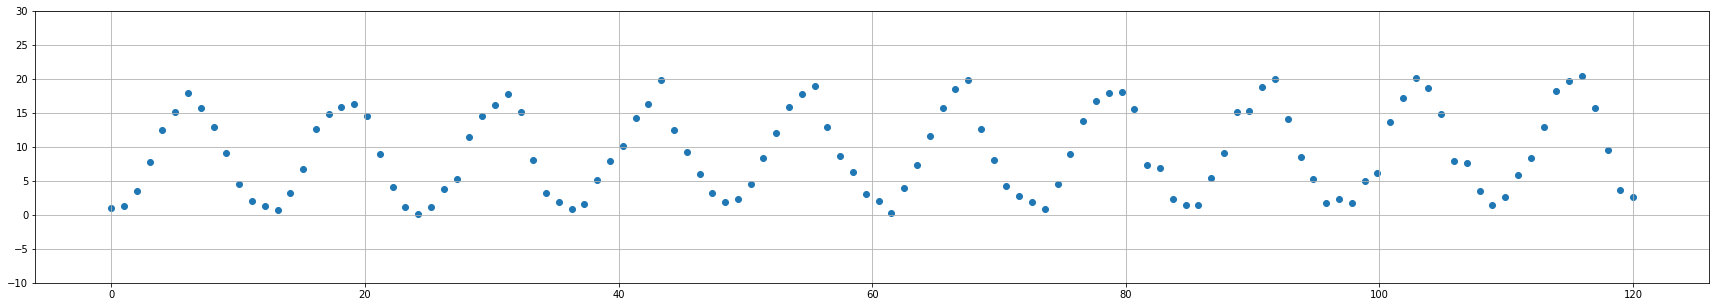

In [7]:
plt.figure(figsize = (30,5))
plt.scatter(t, mounthly_temperature)
plt.ylim([-10,30])
plt.grid()
plt.show()

In [8]:
def gradient(parameters, data):
    alpha, beta, gamma, delta, t_0 = parameters
    
    gradient_alpha = 2*np.sum([(T(t, alpha, beta, gamma, delta, t_0) - data[t-1]) * \
                               (t - t_0) * np.sin((2 * np.pi * (t - t_0))/12) for t in range(1, len(data) + 1)])
    gradient_beta = 2*np.sum([(T(t, alpha, beta, gamma, delta, t_0) - data[t-1]) * \
                              np.sin((2 * np.pi * (t - t_0))/12) for t in range(1, len(data) + 1)])
    gradient_gamma = 2*np.sum([(T(t, alpha, beta, gamma, delta, t_0) - data[t-1]) * t for t in range(1, len(data) + 1)])
    gradient_delta = 2*np.sum([(T(t, alpha, beta, gamma, delta, t_0) - data[t-1]) for t in range(1, len(data) + 1)])
    gradient_t_0 = 2*np.sum([(T(t, alpha, beta, gamma, delta, t_0) - data[t-1]) * \
                             (alpha * np.sin((2 * np.pi * (t - t_0))/12) - 1/6 * np.pi * \
                              np.cos((2 * np.pi * (t - t_0))/12) * (beta + alpha * (t - t_0))) \
                             for t in range(1, len(data) + 1)])
    parameters_gradient = np.array([gradient_alpha, gradient_beta, gradient_gamma, gradient_delta, gradient_t_0])
    return parameters_gradient

In [305]:
def T(t, alpha, beta, gamma, delta, t_0):
    return (alpha * (t - t_0) + beta) * np.sin((2 * np.pi * (t - t_0))/12) + gamma * t + delta

def objective_function(parameters, data):
    alpha, beta, gamma, delta, t_0 = parameters
    predicted = np.array([T(t, alpha, beta, gamma, delta, t_0) for t in range(1, len(data) + 1)])
    error = predicted - np.array(data)
    return np.sum(error**2)

def newtons_method(func, initial_params, data, sigma, b, max_iterations=100, epsilon=1e-8):
    parameters = np.array(initial_params)
    for _ in range(max_iterations):
        gradient_func = grad(func, argnum=0)
        hessian_func = hessian(func, argnum=0)
        gradient_at_point = gradient_func(parameters, data)
        hessian_at_point = hessian_func(parameters, data)
        
        grad_hess = np.linalg.inv(hessian_at_point) @ gradient_at_point
        
        a = 1.0
        while func(parameters - a * grad_hess, data) >= func(parameters, data) - \
                                    sigma * a * gradient_at_point.T @ grad_hess:
            a *= b
        parameters -= a * grad_hess  # Update parameters
        
        if np.linalg.norm(a * grad_hess) < epsilon:
            break
            
    return parameters, a

In [306]:
%%time
initial_params = [1.0, 1.0,  1.0,  1.0,  1.0]
sigma = 0.5
b = 0.5

params = newtons_method(objective_function, initial_params, mounthly_temperature, sigma, b)

Wall time: 4.1 s


In [307]:
params

(array([0.01094092, 7.97264988, 0.01624561, 8.18077087, 4.16415489]), 1.0)

In [308]:
t = np.linspace(1, 121, 120)

theo_temperature = T(t, *params[0])

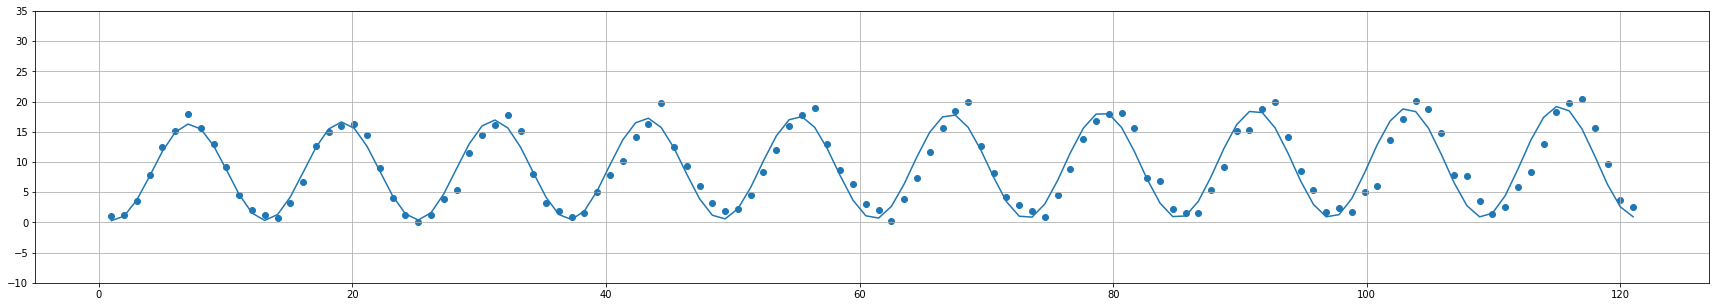

In [309]:
plt.figure(figsize = (30,5))
plt.scatter(t, mounthly_temperature)
plt.plot(t, theo_temperature)
plt.ylim([-10,35])
plt.grid()
plt.show()

In [310]:
objective_function(params[0], mounthly_temperature)

164.22107125252705